<table>
<table border = 5  align = center bgcolor="white" cellspacing="10px">

<tr>
<td><a href="https://drive.google.com/file/d/1--wnF2vQE2nDQ8rC8iMa2A2Sk1tNwPwz/view?usp=sharing"> <img alt="Colaboratory logo" width="150px"  src="https://miro.medium.com/max/986/1*S2AyJcdw8EPcn7gwDVSBCA.png" align="left" hspace="10px" vspace="0px" /> </a> </td>
   
    
 
<td></td>
    
<td><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitmilab.redclara.net%2FhalleyUIS%2Fmoncora.git/4d1344cb6f0df9a23bce6fe9d70812719aeb0fe5?urlpath=lab%2Ftree%2FBook%2FJupyter_Notebooks%2FDatosII_a.ipynb"><img src="https://mybinder.org/static/images/logo_social.png" alt="Alternative text" width="150px"  /></a>
</td>

</tr>

</table>
    
<br>

---
    
# <strong>Los datos hablan II. Análisis semana vs fin de seamana</strong>

In [ ]:
!pip install APIMakeSens

In [1]:
import pandas as pd                   # Librería de manejo de datos en DataFrames
import numpy as np                    # Librería de cálculos matemáticos con Arrays
import matplotlib.pyplot as plt       # Librería de gráficas
import matplotlib.dates as mdates     # Módulo de manejo de fechas en las etiquetas de una gráfica
from MakeSens import MakeSens         # Libería de descarga de datos del proyecto RACIMO-MONCORA

## **Importación de datos**

In [2]:
fecha_inicio = "2023-08-14 00:00:00"
fecha_fin = "2023-09-17 23:59:00"
estacion = "mE1_00008"                      # FCUIS: 'mE1_00008'
frecuencia = "6H"                          # 1T: 1 unidad de tiempo / minuto, 1H: 1 hora, 1D: 1 día

data = MakeSens.download_data(estacion, fecha_inicio, fecha_fin, frecuencia)

## **Selección de datos Material Particulado**

In [3]:
# Selección de columnas
columnas = ["pm10_1", "pm10_2","pm25_1", "pm25_2", "pm1_1", "pm1_2", 'ts']
pm_data = data[columnas]

# Ajuste del índice de la tabla de datos. Ponemos el tiempo como índice:
pm_data = pm_data.set_index('ts')
pm_data.index = pd.to_datetime(pm_data.index)

#pm_data

## **Limpiando datos**

Para que sea un poco más sencillo manejar nuestros datos, definiremos un nuevo DataFrame para almacenar solo con las variables de material particulado. Luego convertiremos el índice de los datos a formato de fecha y hora con la función ```to_datetime()```.

In [4]:
columnas = pm_data.columns # Guardamos los nombres de las columnas en una lista
for col in columnas:                                             # Iteramos entre cada columna
    pm_data[col] = pm_data[col].where(pm_data[col]<120, np.nan)  # Reemplazamos los valores mayores a 120 por NaN

In [5]:
show = False         #  Muestra la grafica si es verdadero.
if show:
    # Graficamos los datos limpios de pm10 
    fig = plt.figure(figsize=(12, 6))            # Figura
    ax = fig.gca()                               # Ejes
    plt.plot(pm_data.index, pm_data['pm10_1'], '.',label = 'Sensor 1', alpha=0.7)   # Datos pm10_1
    plt.plot(pm_data.index, pm_data['pm10_2'], '.',label = 'Sensor 2', alpha=0.7)   # Datos pm10_2

    # Configuramos etiquetas
    plt.title("Datos de PM 10", fontsize=20)
    plt.xlabel("Fecha",         fontsize=15)
    plt.ylabel(r"Concentración [$\mu g/m^3$]", fontsize=15)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))     # Formato de fecha: %b: mes, %d: día, %Y: año
    plt.grid(alpha=0.5, linestyle="--")
    plt.legend(fontsize=12)
    plt.show()

## **¿La concentración de material particulado cambia los fines de semana?**

Vamos a comparar la concentración de material particulado $PM_{2.5}$, durante los días de semana (lunes a viernes) con los fines de semana (sábado y domingo). Antes de empezar, es crucial tomarnos un tiempo para pensar en el problema que queremos resolver y el resultado que esperamos obtener para así tener una nocion de lo que estamos haciendo. Por ejemplo, ¿Esperamos que la concentración de material particulado aumente o disminuya los fines de semana?

### Vistazo rápido a los datos

Usemos la función ```.dayofweek``` de Pandas para obtener el día de la semana de cada medición. Luego, usando la función ```.scatter()``` de Matplotlib, grafiquemos la concentración de material particulado $PM_{2.5}$ en función del día de la semana. ¿Qué observamos?

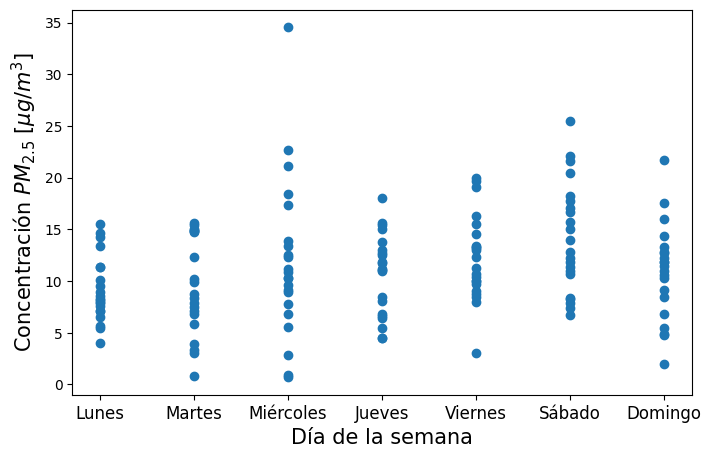

In [6]:
# Demos una vista rápida de como se agrupan nuestro datos para cada día de la semana. 
# Ten en cuenta que 0:Lunes y 6:Domingo.

plt.figure(figsize=(8,5))
plt.scatter(pm_data.index.dayofweek, pm_data.pm25_1)
plt.xticks(range(7), ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"], fontsize=12)

plt.ylabel("Concentración $PM_{2.5}$ [$\mu g/m^3$]", fontsize=15)
plt.xlabel("Día de la semana", fontsize=15)
plt.show()

Podemos ver que la mayoría de los datos mantienen una concentración menor a $40 \mu g/m^3$. ¿Qué pasa con los datos de los fines de semana? ¿Son mayores o menores que los de los días de semana? Para sacar una conclusión más profunda, debemos realizar un análisis estadístico de los datos.

### **Análisis estadístico**
Ya que estamos interesados en comparar la concentración de PM$_{2.5}$ entre días de la semana, vamos a trabajar con el promedio para cada día. 

In [11]:
pm_d

,pm10_1,pm10_2,pm25_1,pm25_2,pm1_1,pm1_2,semana,clase
ts,,,,,,,,
2023-08-14,11.339886,10.206250,10.251275,9.719232,7.471455,6.839828,33,1
2023-08-15,14.979784,13.563908,13.650064,12.915883,9.789344,8.903313,33,1
2023-08-16,10.510156,9.305952,9.544027,8.858623,6.919180,6.153031,33,1
2023-08-17,7.326974,6.545990,6.556324,6.169002,4.994727,4.412672,33,1
2023-08-18,9.516257,8.549425,8.703905,8.092498,6.309872,5.559823,33,1
2023-08-19,9.456428,8.200522,8.534724,7.825655,6.264809,5.535279,33,0
2023-08-20,9.784992,8.566784,8.901098,8.150511,6.310451,5.513904,33,0
2023-08-21,7.773564,6.800288,6.944725,6.408504,5.019249,4.389259,34,1
2023-08-22,4.084787,3.538935,3.562840,3.325750,2.580638,2.242797,34,1


In [12]:
pm_s

pm10_1     pm10_2     pm25_1     pm25_2      pm1_1      pm1_2
semana clase                                                                  
33     0       9.620710   8.383653   8.717911   7.988083   6.287630   5.524592
       1      10.734611   9.634305   9.741119   9.151047   7.096916   6.373733
34     0      13.605491  12.378945  12.505770  11.862386   9.061026   8.337414
       1       6.971471   6.229835   6.263928   5.910142   4.619289   4.125771
35     0      18.261294  17.520023  16.655476  16.803714  11.329555  11.031880
       1      17.091416  16.000409  15.699224  15.328723  11.134413  10.582292
36     0      13.255327  12.729504  12.078055  12.188106   8.484708   8.277670
       1      13.836558  13.328977  12.601051  12.770609   8.974230   8.775009
37     0      13.751773  13.446353  12.636983  12.937410   9.084370   8.998967
       1      10.422857  10.187511   9.448753   9.748326   6.903331   6.888940

In [13]:
## Datos diarios
pm_d = pm_data.resample('D').mean()            # Datos diarios
pm_d['semana'] = pm_d.index.isocalendar().week # Columna semana del año
pm_d['dia'] = pm_d.index.isocalendar().day     # Columna día del año

## Columna EnSemana
clase = pm_d['dia'].values
for i in range(len(clase)):
    if clase[i] in [1,2,3,4,5]:
        clase[i] = 1
    else:
        clase[i] = 0
pm_d['clase'] = pd.Series(clase, index=pm_d.index)
del pm_d['dia']

## Agrupar por semana y por clase
pm_s = pm_d.groupby(['semana','clase']).mean()

## Calcular ratios
columnas = pm_s.columns          # Columnas
semanas = pm_d.semana.unique()   # Semanas

# Eliminamos semanas incompletas
if 0 not in list(pm_s.loc[semanas[-1]].index):
    semanas = semanas[:-1]
if 1 not in list(pm_s.loc[semanas[0]].index):
    semanas = semanas[1:] 
 
Ratios = {}
for col in columnas:
    Ratios[col] = []
for semana in semanas:
    for col in columnas:
        f = (pm_s.loc[semana,0] / pm_s.loc[semana,1])[col]
        Ratios[col].append(f)
Ratios = pd.DataFrame(Ratios,index=semanas)

## Columna de fechas
import datetime
date = []
for s in semanas:
    date.append(datetime.date.fromisocalendar(2023, s, 1))
Ratios['date'] = pd.to_datetime(date)
Ratios

,pm10_1,pm10_2,pm25_1,pm25_2,pm1_1,pm1_2,date
33,0.896233,0.870188,0.894960,0.872915,0.885967,0.866775,2023-08-14
34,1.951596,1.987042,1.996474,2.007124,1.961563,2.020814,2023-08-21
35,1.068448,1.094973,1.060911,1.096224,1.017526,1.042485,2023-08-28
36,0.957993,0.955025,0.958496,0.954387,0.945453,0.943323,2023-09-04
37,1.319386,1.319886,1.337423,1.327142,1.315940,1.306292,2023-09-11


In [8]:
#pm_s

#### **Graficas**

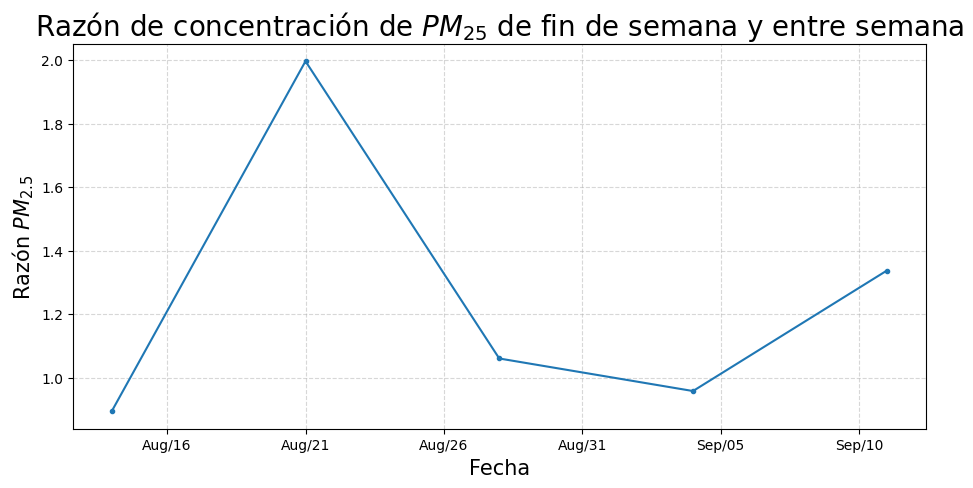

In [9]:
#Ahora vizualicemos los datos
fig, ax = plt.subplots(figsize=(11, 5))
ax.set_title("Razón de concentración de $PM_{25}$ de fin de semana y entre semana", fontsize=20)
ax.set_xlabel("Fecha", fontsize=15)
ax.set_ylabel("Razón $PM_{2.5}$", fontsize=15)
ax.plot(Ratios.date,Ratios.pm25_1, "-", marker="o", markersize=3)
ax.grid(alpha=0.5, linestyle="--")

#Podemos formatear el eje de las fechas para que se vea mejor
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.show()

> ¿Que representa un valor mayor que uno? ¿Un valor menor que uno?

> Puedes explicar el resultado ¿Obtuviste lo que esperabas?